# PRACTICA GUIADA: Regresión lineal con predictores cualitativos

## 1. Introducción
1.Introduccón al dataset "bikeshare" 
* Leyendo los datos
* Visualizando los datos

2.Regresión lineal
* Forma de regresión lineal
* Construir un modelo de regresión lineal
* Uso del modelo para la predicción
* ¿Es importante la escala de las features?

3.Trabajando con múltiples features
* Visualizando los datos 
* Agregando más features al modelo

4.Eligiendo entre modelos
* Selección de features
* Métricas de evaluación para problemas de regresión
* Comparación de modelos con sets de entrenamiento/test y RMSE
* Comparando RMSE de prueba con RMSE nulo (baseline)
       
5.Creando features
* Manejo de feactures categóricas
* Ingeniería de features



**===========================================================================================**

### 1.1 Importando datos

Vamos a trabajar con un conjunto de datos sobre alquileres de bicicletas que fue utilizado en un concurso de Kaggle


Se proporcionan datos de alquiler por hora que abarcan dos años. El conjunto de entrenamiento se compone de los primeros 19 días de cada mes, mientras que el conjunto de test es del día 20 al final del mes. **_Queremos predecir el número total de bicicletas alquiladas durante cada hora cubierta por el conjunto de test, utilizando sólo la información disponible en el set de entrenamiento._**


**CAMPOS DEL SET**

**datetime** - hourly date + timestamp

**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather** - 

              1: Clear, Few clouds, Partly cloudy, Partly cloudy
              2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
              3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,
                 Light Rain + Scattered clouds
              4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**count** - number of total rentals


In [1]:
# Leemos los datos y seteamos el datetime como índice.
import pandas as pd

bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [2]:
bikes.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


**Preguntas:**

*     ¿Qué representa cada observación?
*     ¿Cuál es la variable de respuesta (como se define por Kaggle)?
*     ¿Cuántas variables hay?

In [3]:
# Dado que "count" es un método de pandas, es conviente renombrar la columna:

bikes.rename(columns={'count':'total'}, inplace=True)

### 1.2 Visualización

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Definimos parámetros globales para matplotlib.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

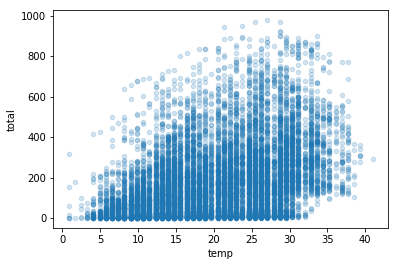

In [5]:
# Ploteamos puntos con Pandas
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2);

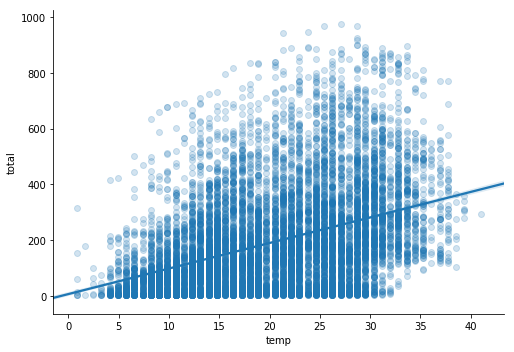

In [6]:
# Ajuste con Seaborn (modelo lineal) 
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.45, scatter_kws={'alpha':0.2});

## 2. Repaso: forma del modelo lineal

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- $y$ es la variable dependiente (es la respuesta)
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ 
- $\beta_n$ es el coeficiente para $x_n$

Los **$\beta$** son los llamados **_Coeficientes del modelo_**

- Estos valores son estimados (o "aprendidos") durante el proceso de adaptación del modelo usando el criterio ** mínimos cuadrados **.
- Específicamente, encontramos la línea (matemáticamente) que minimiza la suma ** de cuadrados de residuos ** (o "suma de errores cuadráticos").
- Y una vez que hemos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.


## 3. Construyendo el modelo de Regresión Lineal

Empezamos por una regresión lineal simple

In [7]:
# Creamos X e y

feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [8]:
# Importamos paquete, instanciamos el estimador y fiteamos el modelo ("classic" sklearn!)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

6.046212959617776
[9.17054048]


Interpretación del  **intercepto ** ($\beta_0$):

- Es el valor esperado de $ y $ cuando $ x $ = 0.
- Por lo tanto, es el número esperado de alquileres cuando la temperatura es de 0 grados Celsius.
- ** Nota: ** No siempre tiene sentido interpretar el intercepto. (¿Por qué?)

Interpretación del coeficiente de ** "temp" ** ($\beta_1$):

- Es el cambio en $ y $ dividido por cambio en $ x $, o la "pendiente".
- Así, un aumento de la temperatura de 1 grado Celsius está ** asociado con ** un aumento de alquiler de 9.17 bicicletas.
 $ \beta_1 $ sería ** negativo ** si un aumento en la temperatura se asociara con una ** disminución ** en los alquileres.

## 4. Usando el modelo para predecir

¿Cuántos alquileres de bicicletas podríamos predecir si la temperatura era de 25 grados Celsius?

In [10]:
# Aplicando la fórmula manualmente

linreg.intercept_ + linreg.coef_*25

array([235.309725])

In [11]:
# usando el método del objeto

linreg.predict(25)

array([235.309725])

## 5. ¿Es importante la escala de las features?

Digamos que la temperatura se midió en grados Fahrenheit, en lugar de Celsius. ¿Cómo afecta esto al modelo? Veremos esto con mucho más detalle en una  clase próxima

In [12]:
# Creamos una nueva columna para la temperatura en Fahrenheit
# ℃ = (℉ - 32)/1.8

bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


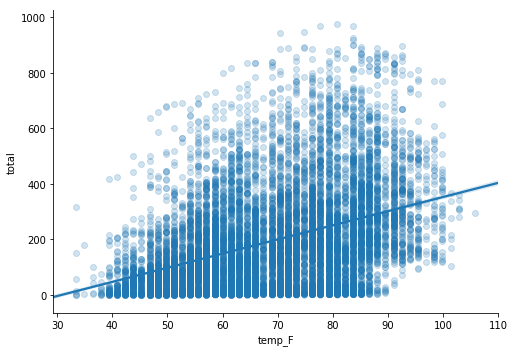

In [13]:
# Nuevamente ajustamos con Seaborn 
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.45, scatter_kws={'alpha':0.2});

In [14]:
# creamos nuevamente X e y

feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# Instanciamos el modelo y fiteamos

linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes

print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129423
[5.09474471]


In [15]:
# Convertimos 25°c a °F

25 * 1.8 + 32

77.0

In [16]:
# Predicción de alquileres para 77°F

linreg.predict(77)

array([235.309725])

** Conclusión: ** La escala de las características es ** irrelevante ** para los modelos de regresión lineal. Al cambiar la escala, simplemente cambiamos nuestra ** interpretación ** de los coeficientes.

In [17]:
# borramos la columna temp_F 

bikes.drop('temp_F', axis=1, inplace=True)

## 6. Visualización de los datos 2

In [18]:
# Exploramos más features

feature_cols = ['temp', 'season', 'weather', 'humidity']

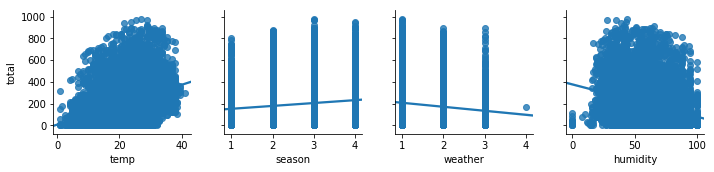

In [19]:
# plots múltiples en seaborn

sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg');

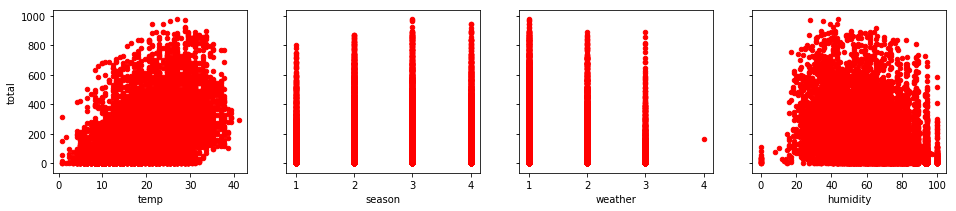

In [20]:
# plots múltiples en pandas

fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3),color='r')

### <center>** ¿Qué estamos viendo? ** 

In [21]:
# Creamos una tabulación cruzada para las variables "season" y 'month'.(o sea miramos la cantidad de filas por estación y por mes)

pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


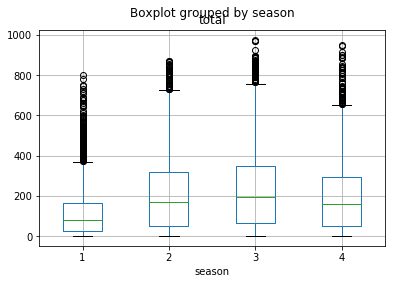

In [22]:
# Hacemos un box plot de los alquileres agrupados por season

bikes.boxplot(column='total', by='season');

__Notar!!:__

- Una línea no puede capturar una relación no lineal.
- ¿Será que hay más alquileres en invierno que en primavera??

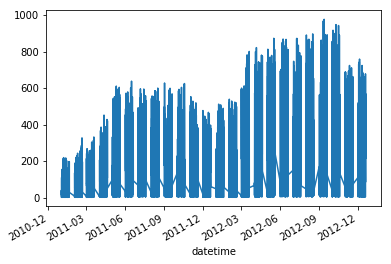

In [23]:
# plots alquileres en función de los meses

bikes.total.plot();

¿Qué nos dice esto?

Hay más alquileres en el invierno que en la primavera, pero sólo porque el sistema está experimentando un ** crecimiento general ** y los meses de invierno vienen después de los meses de primavera.

In [24]:
# matriz de correlación (rangos de 1 a -1)

bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


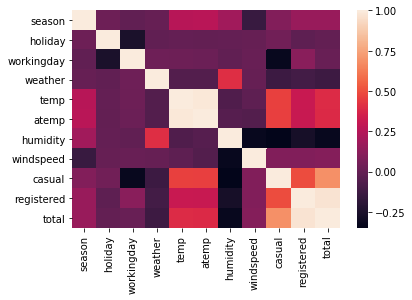

In [25]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(bikes.corr());

<center>__¿Qué relaciones se observan?__

## 7. Sumando más features

In [26]:
# creamos lista de features

feature_cols = ['temp', 'humidity']

In [27]:
# creamos nuevamente X and y
X = bikes[feature_cols]
y = bikes.total

# creamos el modelo y fiteamos
linreg = LinearRegression()
linreg.fit(X, y)

# Imprimimos coeficientes
print (linreg.intercept_)
print (linreg.coef_)

185.6644172503543
[ 8.7281356  -2.75775952]


In [28]:
## para observarlo mejor miramos el nombre con el coeficiente
list(zip(feature_cols, linreg.coef_))

[('temp', 8.728135597889878), ('humidity', -2.7577595165422113)]

## 8. Selección de features

¿Cómo elegimos cuales features incluir en el modelo? Vamos a usar los sets de  ** entrenamiento y test ** (y eventualmente ** validación cruzada **).


## 9. Métricas de evaluación para problemas de regresión

 Hay tres métricas de evaluación comunes para problemas de regresión:

** El error absoluto medio ** (MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

** Mean Squared Error ** (MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

** Error cuadrático medio raíz ** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

In [29]:
# Ejemplo de valores de respuesta verdaderos y predichos
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]
pred = [12, 8, 3, 4, 12, 9, 8, 12, 13]

In [30]:
# ¿Calculamos métricas a mano? ¡Por supuesto que no!

from sklearn import metrics
import numpy as np
print ('MAE:', metrics.mean_absolute_error(true, pred))
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.4444444444444444
MSE: 2.7777777777777777
RMSE: 1.6666666666666667
R2: 0.7054973821989529


Comparando estas métricas:

- ** MAE **  es el error promedio.
- ** MSE **  "penaliza" errores grandes.
- ** RMSE **  es interpretable, tiene las mismas unidades  que la "y".
- ** $R^2$ ** es la proporción de la varianza total de $Y$ explicada por el modelo.

Con excepción de R2, todas estas son ** funciones de pérdida **, porque queremos minimizarlas.

Ejemplo adicional, para ver cómo MSE / RMSE penalizan más a los errores más grandes:

In [31]:
# con los mismos valores de antes para true
true = [10, 7, 5, 5, 10, 8, 8, 15, 12]

# nuevo set de valores para la predicción
pred = [12, 8, 3, 4, 12, 9, 8, 22, 13]

# MAE se incrementa levemente
print ('MAE:', metrics.mean_absolute_error(true, pred))

# MSE y RMSE son más grandes que antes. A su vez, R2 empeora su performance.
print ('MSE:', metrics.mean_squared_error(true, pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))
print ('R2:', metrics.r2_score(true, pred))

MAE: 1.8888888888888888
MSE: 7.222222222222222
RMSE: 2.6874192494328497
R2: 0.23429319371727741


## 10. Comparando modelos usando sets de entrenamiento/test y RMSE

In [32]:
from sklearn.model_selection import train_test_split

# Definimos una función que acepta una lista de features y devuelve la prueba RMSE

def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [33]:
# comparamos diferentes ensambles de features
print (train_test_rmse(['temp', 'humidity']))
print (train_test_rmse(['temp', 'humidity','windspeed']))

157.19019119483033
157.15349782958978


In [34]:
# Usando features no permitidas!!!
# Son las features que componen la variable de respuesta.
# Por definición la cantidad total de bicis prestadas es la suma de bicis prestadas a usuarios casuales y registrados
# No tiene ningún sentido hacer un modelo de esto
# Pero como la relación es tan directa, las métricas de error son bajísimas.
print (train_test_rmse(['casual', 'registered']))

2.766167503630101e-13


In [35]:
# Chequeamos que las columnas son perfectamente dependientes.
np.all(bikes.casual + bikes.registered == bikes.total)

True

## 11. Manejo de características categóricas

Scikit-learn espera que todos los features sean numéricos. Entonces, ¿cómo incluimos una característica categórica en nuestro modelo?

- ** Categorías ordenadas: ** transformarlas en valores numéricos que representan ese orden 
- ** Categorías no ordenadas: ** utilizar codificación ficticia (0/1) (Variables-dummy)

¿Cuáles son las características categóricas de nuestro conjunto de datos?

- ** Categorías ordenadas: ** weather (ya codificado con valores numéricos que representan el orden)
- ** Categorías no ordenadas: ** season (necesita variables dummy), holiday (Ya está codificada como dummy), workingday (ya está codificada como dummy)

Para la temporada, no podemos simplemente dejar la codificación como 1 = primavera, 2 = verano, 3 = otoño y 4 = invierno, porque eso implicaría una ** relación ordenada **. En cambio, creamos ** variables dummies: **

In [36]:
# crear variables dummies
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# imprimimos para ver 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


Nota: El método `get_dummies` puede recibir un dataframe entero, en ese caso no modifica las variables numéricas y genera dummies para todas las categóricas que encuentre. 

Sin embargo, en realidad sólo necesitamos ** tres variables dummy (no cuatro) **, y por lo tanto vamos a dropear la primera variable dummy.

¿Por qué?

In [37]:
# Salteamos la primer columna
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# imprimimos 5 filas cualquieras
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


En general, si se tiene una feature categórica con ** k valores posibles **, se tienen que crear ** k-1 variables dummies **.

In [38]:
# Concatenar el DataFrame original y el dummy DataFrame (axis = 0 significa filas, axis = 1 significa columnas)
bikes = pd.concat([bikes, season_dummies], axis=1)

# imprimimos 5 filas cualquieras
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


In [39]:
# Incluímos variables dummies

feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)

list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575752),
 ('season_2', -3.3905430997189026),
 ('season_3', -41.73686071317162),
 ('season_4', 64.41596146824186),
 ('humidity', -2.8194816362596438)]

¿Cómo interpretamos los coeficientes de season? ** se miden con respecto a la línea de base (spring) **:

- Manteniendo todas las demás características fijas, ** summer ** se asocia con una ** disminución de alquiler de 3.39 bicicletas ** en comparación con spring.
- Manteniendo todas las demás características fijas, ** fall ** se asocia con una ** disminución de alquiler de 41,7 bicicletas ** en comparación con spring.
- Manteniendo todas las demás características fijas, ** winter ** se asocia con un ** aumento de alquiler de 64,4 bicicletas ** en comparación con spring.

¿Qué pasa si cambiamos la dummy que se definió como la línea de base? ¿Cambiarían los efectos?

- No, simplemente cambiaría nuestra ** interpretación ** de los coeficientes.

** Importante: ** La codificación por dummies es relevante para todos los modelos de aprendizaje automático, no sólo para los modelos de regresión lineal.

In [40]:
print (train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

154.33394593635998


# 12. Conclusiones: Comparación de la regresión lineal con otros modelos

Ventajas de la regresión lineal:

- Simple de explicar
- Muy interpretable
- El entrenamiento y predicción de modelos son rápidos
- Es invariante a cambios en la escala de los features. 
- No se puede estimar por mínimos cuadrados si el número de features es mayor al número de observaciones. 


Desventajas de la regresión lineal:

- El rendimiento es (generalmente) no competitivo con los mejores métodos de aprendizaje supervisado debido a un alto sesgo